### Unsupervised Learning-Clustering & Association

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Import Libraries

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from missingpy import KNNImputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load Data

In [3]:
veh = pd.read_csv("https://raw.githubusercontent.com/justicejanak/Stat-517/master/vehicles.csv")
veh.head(3)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
veh.shape

(39588, 83)

In [5]:
#veh.columns

### Preprocessing the Dataset

In [6]:
# Unwanted variables were being removed
Y_veh =veh[u'make']
X_veh = veh.drop([u'make',u'co2',
       u'co2A', u'eng_dscr', u'fuelType1',u'ghgScore', u'ghgScoreA', u'hlv', u'hpv' ,
    u'id', u'lv2', u'lv4', u'pv2', u'pv4', u'model', u'VClass', u'guzzler',
       u'trans_dscr', u'tCharger', u'sCharger', u'atvType', u'fuelType2', u'rangeA',
        u'evMotor',u'mfrCode', u'c240Dscr', u'c240bDscr', u'createdOn',
                  u'startStop'], axis=1)
Xcolnames = list(X_veh)

In [7]:
X_veh = pd.get_dummies(X_veh, columns =[u'drive', u'feScore', u'fuelType', u'mpgData', 
                 u'phevBlended', u'trany', u'youSaveSpend', u'modifiedOn'])
X_veh.head(3)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,modifiedOn_Wed Mar 25 00:00:00 EDT 2015,modifiedOn_Wed May 04 00:00:00 EDT 2016,modifiedOn_Wed May 18 00:00:00 EDT 2016,modifiedOn_Wed May 24 00:00:00 EDT 2017,modifiedOn_Wed Oct 05 00:00:00 EDT 2016,modifiedOn_Wed Oct 11 00:00:00 EDT 2017,modifiedOn_Wed Oct 12 00:00:00 EDT 2016,modifiedOn_Wed Oct 19 00:00:00 EDT 2016,modifiedOn_Wed Oct 26 00:00:00 EDT 2016,modifiedOn_Wed Sep 27 00:00:00 EDT 2017
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_veh=X_veh.select_dtypes(include=['uint8'])
X_veh.shape

(39588, 229)

In [9]:
#X_veh was converted into an excel file to perform detail associations in R
#X_veh.to_csv("example12.csv")

In [10]:
#Minor associations were performed here
assoc = apriori(X_veh, min_support=0.25, use_colnames=True)
assoc.head(20)

,support,itemsets
0,0.348641,(drive_Front-Wheel Drive)
1,0.338537,(drive_Rear-Wheel Drive)
2,0.808806,(feScore_-1)
3,0.272810,(fuelType_Premium)
4,0.652395,(fuelType_Regular)
5,0.678968,(mpgData_N)
6,0.321032,(mpgData_Y)
7,0.998257,(phevBlended_False)
8,0.278999,(trany_Automatic 4-spd)
9,0.743609,(modifiedOn_Tue Jan 01 00:00:00 EST 2013)


### Using Silhouette and Elbow Method to determine Optimal Number of Clusters 

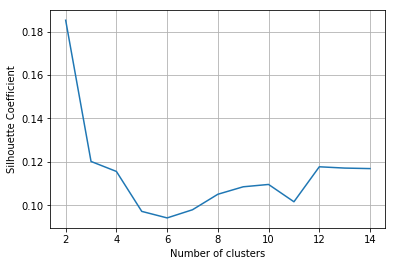

In [12]:
#The optimal number of clusters below is 2
from sklearn import metrics
from sklearn.cluster import KMeans

k_range = range(2, 15)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_veh)
    scores.append(metrics.silhouette_score(X_veh, km.labels_, sample_size=10000))

optimal_k = k_range[scores.index(max(scores))]    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

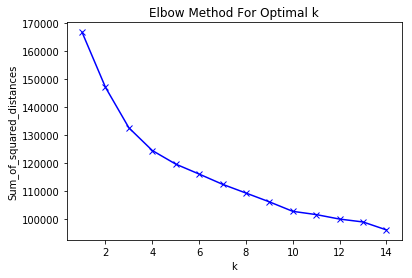

In [11]:
#The optimal number of clusters below is 4
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_veh)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Hierarchical clustering

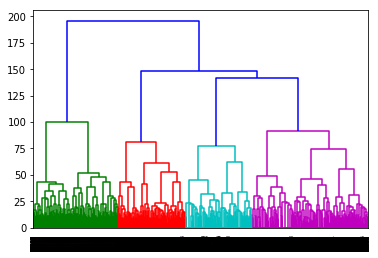

In [12]:
hier_type2 = linkage(X_veh, 'ward')
dend = dendrogram(hier_type2)

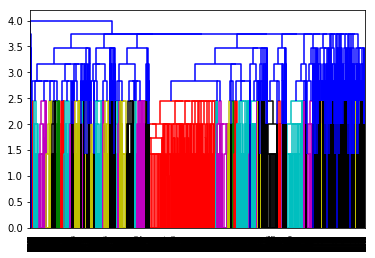

In [11]:
Z = linkage(X_veh, 'complete')
dn = dendrogram(Z)

### PCA to reduce dimensions

In [11]:
scaler = StandardScaler()
scaler.fit(X_veh)
X_scaled = scaler.transform(X_veh)

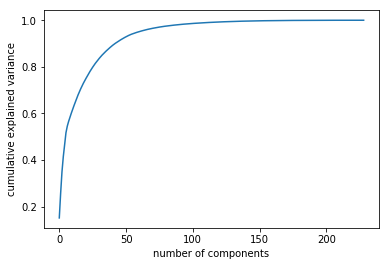

In [12]:
pca = PCA().fit(X_veh)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

From the plot above, it appears the first 50 of the principle component captures about 90% of the variability in the dataset. Hence we use the first 50 PCA's for computing

In [12]:
pca = PCA(n_components=50)
pca.fit(X_veh)
X_veh_50PCA = pca.transform(X_veh)

### K-means Clustering

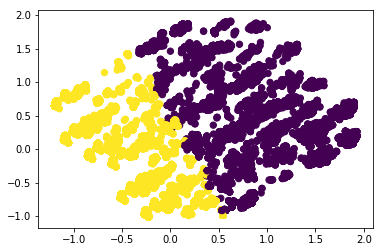

In [13]:
#MiniBatchKmeans Clustering, k=2
clustering = MiniBatchKMeans(n_clusters=2).fit(X_veh_50PCA )
labels = clustering.labels_
plt.scatter(X_veh_50PCA [:, 0], X_veh_50PCA [:, 1], c=labels, s=40, cmap='viridis')

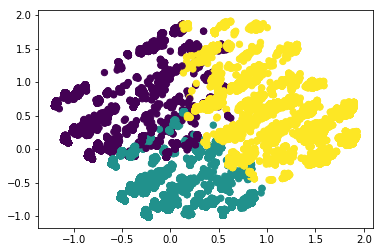

In [15]:
#MiniBatchKmeans Clustering, k=3
clustering = MiniBatchKMeans(n_clusters=3).fit(X_veh_50PCA )
labels = clustering.labels_
plt.scatter(X_veh_50PCA [:, 0], X_veh_50PCA [:, 1], c=labels, s=40, cmap='viridis')

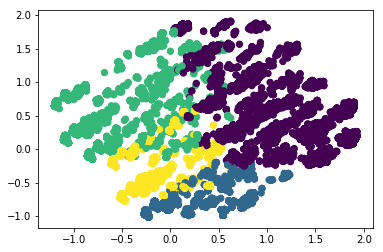

In [16]:
#MiniBatchKmeans Clustering, k=4
clustering = MiniBatchKMeans(n_clusters=4).fit(X_veh_50PCA )
labels = clustering.labels_
plt.scatter(X_veh_50PCA [:, 0], X_veh_50PCA [:, 1], c=labels, s=40, cmap='viridis')

In [ ]:
#Agglomerative Clustering
#This measures together successfully pair of clusters
clustering = AgglomerativeClustering(n_clusters=4).fit(X_veh_50PCA)
labels = clustering.labels_
plt.scatter(X_veh_50PCA[:, 0], X_veh_50PCA[:, 1], c=labels, s=40, cmap='viridis')